<a href="https://colab.research.google.com/github/IGiovanniRamirez/Giovanni-Ramirez-Data-Portfolio/blob/main/Project_ConnectaTel/Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?



---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users

print(users.isna().sum().sort_values(ascending=False))# Cantidad de valores nulos
print(users.isna().mean().sort_values(ascending=False)) # Proporción de valores nulos

churn_date    3534
city           469
user_id          0
first_name       0
last_name        0
age              0
reg_date         0
plan             0
dtype: int64
churn_date    0.88350
city          0.11725
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
reg_date      0.00000
plan          0.00000
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum().sort_values(ascending=False))# Cantidad de valores nulos
print(usage.isna().mean().sort_values(ascending=False)) # Proporción de valores nulos

duration    22076
length      17896
date           50
id              0
user_id         0
type            0
dtype: int64
duration    0.55190
length      0.44740
date        0.00125
id          0.00000
user_id     0.00000
type        0.00000
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

---

**Respuestas Data Set Users:**
- La columna `churn_date` está prácticamente vacía tiene un 88,3% de datos faltantes (3534 de 4000), la primera opción es eliminarla, pero veo una segunda opción que es decidir en conjunto con el equipo de trabajo si se imputa con los datos de fecha de la última llamada o mensaje de texto que haya realizado el usuario, esta información se puede extraer del `Data Set Usage`.
- La columna `city` tiene 11,7% de datos faltantes (469 de 4000), además se ven "sentinels" como "?" habría que imputarlos con "unknown" porque no veo otra manera de investigar la ciudad correspondiente,  o también se podrían imputar con la moda, al igual que los 469 faltantes.

**Respuestas Data Set Usage:**
- Las columnas `duration` y `length` tienen 55,2% y 44,7% de datos faltantes (22076 y 17896 de 40000) respectivamente, yo las dejaría como nulos (NaN), porque en realidad no son valores faltantes pues una columna complementa la información de la otra, donde falta el dato duración de la llamada, está en la otra la longitud del mensaje de texto y viceversa.
- La columna `date` tiene 0,1% de datos faltantes (50 de 40000) que dejaría como nulos porque es una fracción muy pequeña de datos.
      

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` muestra 4000 datos y que la asignación de número de usuario fue uniforme, el mínimo y el máximo son coherentes, un resumen estadístico con promedio, std y los cuartiles en mi concepto no sirve de nada para este tipo de datos, más alla de confirmarme que la distribución de número de usuario fue uniforme.  
- La columna `age` muestra 4000 datos, una desviación estándar alta que está afectada seguramente por valores inválidos con el mínimo -999, el promedio, los cuartiles y valor máximo a simple vista se ven coherentes pero hay que recalcularnos después de reemplazar valores inválidos como el valor mínimo -999.

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`muestran distribuciones uniformes el análisis estadístico no sirve de más para este tipo de datos.
- Las columnas `duration` y `lenght` muestran valores coherentes en todas las variables del análisis estadístico, únicamente se ve que los valores máximos son bastante mayores al resto lo que podría indicar "outliers", pero son valores posibles por lo que se presumen como datos correctos.

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` tiene 7 valores únicos (6 ciudades más el sentinel "?") la ciudad más repetida es Bogotá con 808 repeticiones, se confirma que tiene 469 valores faltantes.
- La columna `plan` tiene 2 valores únicos (2 planes) el plan más repetido es básico con 2595 repeticiones.

In [ ]:
# explorar columna categórica de usage
usage['type'].describe()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` muestra 2 tipos (llamada o mensaje de texto), el tipo mas repetido es text con 22.092 repeticiones


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?
---
**Respuestas Data Set Users:**

-La columna `age` muestra valores inválidos como el valor mínimo -999, yo los caparía (winsorización) con el valor del percentil 1.

**Respuestas Data Set Usage:**

-Las columnas `duration` y `lenght` se ve que los valores máximos son bastante mayores al resto, lo que podría indicar "outliers", pero son valores posibles por lo que se presumen como datos correctos, en ese caso los mantendría (Keep).

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [ ]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, se ve que hay 40 registros con fechas inválidas que hacen referencia al año 2026 que no ha transcurrido y el número de datos para cada uno de los años 2022, 2023 y 2024.

In [ ]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts()

2024.0    39950
Name: date, dtype: int64

En `date`, se ve el número de datos para el año 2024 y faltan los 50 registros que habíamos visto desde antes.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?
---
**Respuestas Data Set users:**

- Aca tenemos los datos para los años 2022, 2023 y 2024, un año en el futuro (2026). Los registros del año 2026 los dejaría como nulos pues son una fracción pequeña con apenas 40 datos.

**Respuestas Data Set usage:**

- Aca tenemos solo fechas correctas, únicamente 50 registros faltantes que como lo habia mencionado antes los dejaría como nulos pues son una fracción pequeña de informacón.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date

fechas_futuras = users[users['reg_date'].dt.year == 2026]['reg_date'].unique()
users['reg_date'] = users['reg_date'].replace(fechas_futuras, pd.NaT)

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False)

2024.0    1330
2023.0    1316
2022.0    1314
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).mean().sort_values(ascending=False)

type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).mean().sort_values(ascending=False)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquí y escribe tu diagnóstico de nulos en `duration` y `length`: Se comprueba con estas verificaciones que los nulos de ambas columnas son MAR porque la ausencia depende de otra variable que se puede observar. Dependen de la variable `type` si es mensaje de texto aparece el valor de longitud y en duracion NaN (99,9276% de ausentes), pero si es llamada aparece la duración y la longitud NaN (99,933% de ausentes).

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas

# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({'is_text': 'sum','is_call': 'sum','duration': 'sum'}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg = usage_agg.rename(columns={'is_text': 'cant_mensajes', 'is_call': 'cant_llamadas','duration': 'cant_minutos_llamada'})
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(usage_agg, users, on=['user_id'], how='inner')
user_profile.head(5)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,23.317054,48.124531
std,1154.898108,2.358416,2.144238,18.168095,17.692032
min,10000.000000,0.000000,0.000000,0.000000,18.000000
25%,10999.500000,4.000000,3.000000,11.120000,33.000000
50%,12000.000000,5.000000,4.000000,19.780000,47.000000
75%,12999.500000,7.000000,6.000000,31.415000,63.000000
max,13999.000000,17.000000,15.000000,155.690000,79.000000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)

Basico     0.648662
Premium    0.351338
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

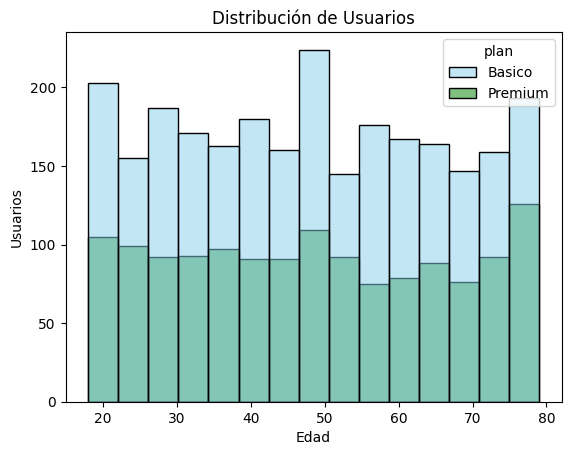

In [ ]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', palette=['skyblue','green'], bins=15, hue='plan')

plt.xlabel('Edad')
plt.ylabel('Usuarios')
plt.title('Distribución de Usuarios')
plt.show()

💡Insights:
- Distribución uniforme sin sesgo hacia ningún lado, el cliente típico no tiene una edad joven ni muy avanzada, pero hay un segmento destacado de adultos cercano a los 50 años, sin embargo, existe una base diversa, útil para campañas diferenciadas por edad, la distribución por tipo de plan también se muestra uniforme lo que indica que no hay una preferencia marcada hacia el plan básico o premium.

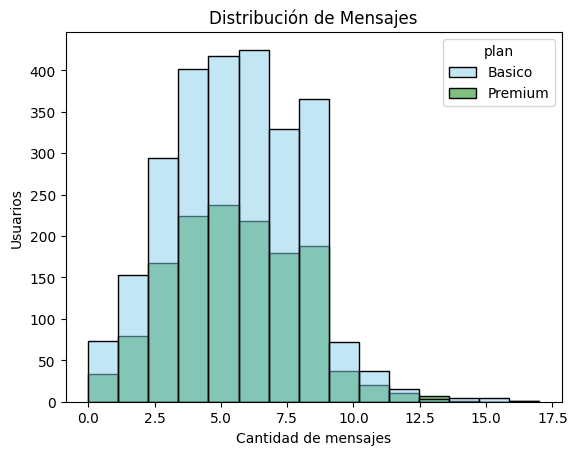

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', palette=['skyblue','green'], bins=15, hue='plan')
plt.xlabel('Cantidad de mensajes')
plt.ylabel('Usuarios')
plt.title('Distribución de Mensajes')
plt.show()

💡Insights:
- Distribución con un leve sesgo a la derecha, indica que la mayoría de los usuarios enviaron hasta alrededor de 8 mensajes, pero existe un grupo pequeño de clientes que enviaron una cantidad mayor de hasta unos 17, la forma de la distribución nos dice que el negocio depende de muchos usuarios que envían una cantidad de mensajes moderada. La distribución por tipo de plan se muestra uniforme lo que indica que no hay una preferencia marcada hacia el plan básico o premium.


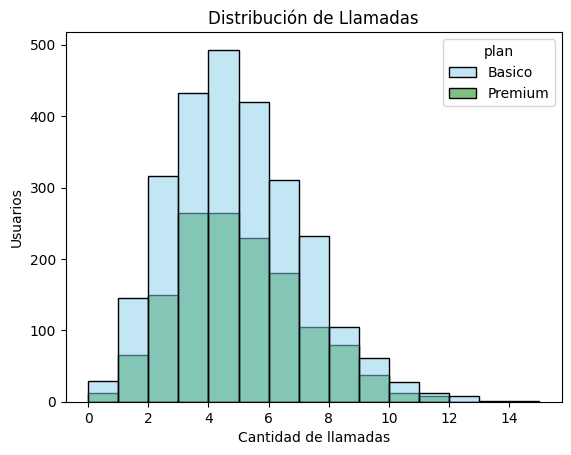

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', palette=['skyblue','green'], bins=15, hue='plan')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Usuarios')
plt.title('Distribución de Llamadas')
plt.show()

💡Insights:
- Distribución con un leve sesgo a la derecha, indica que la mayoría de los usuarios hicieron hasta alrededor de 8 llamadas, pero existe un grupo pequeño de clientes que hicieron una cantidad mayor de hasta unas 15, la forma de la distribución nos dice que el negocio depende de muchos usuarios que hacen una cantidad de llamadas moderada. La distribución por tipo de plan se muestra uniforme en cuanto a la mayoría de usuarios, pero a partir de los clientes que hacen más de 8 llamadas se ve una preferencia por el plan premium.

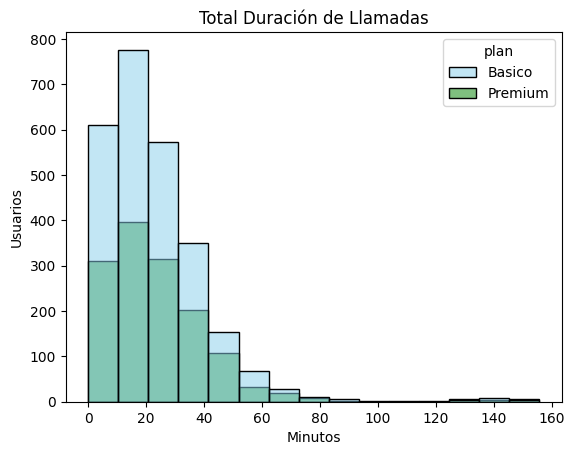

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', palette=['skyblue','green'], bins=15, hue='plan')
plt.xlabel('Minutos')
plt.ylabel('Usuarios')
plt.title('Total Duración de Llamadas')
plt.show()

💡Insights:
- Distribución con sesgo a la derecha, indica que la mayoría de los usuarios hicieron llamadas con una duración acumulada de hasta 40 minutos, pero existe un grupo pequeño de clientes que hicieron llamadas con una duración acumulada de hasta 160, la forma de la distribución nos dice que el negocio depende de muchos usuarios que duran en el teléfono una cantidad de tiempo moderada por cada llamada realizada, pero también de unos pocos que duran más al teléfono. La distribución por tipo de plan se muestra uniforme en cuanto a la mayoría de usuarios, pero muestra una preferencia por el plan premium en una cantidad reducida de personas que tienen mayor gusto por durar más tiempo en el teléfono.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

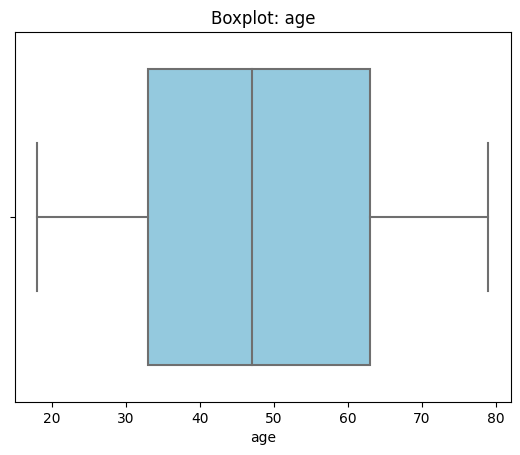

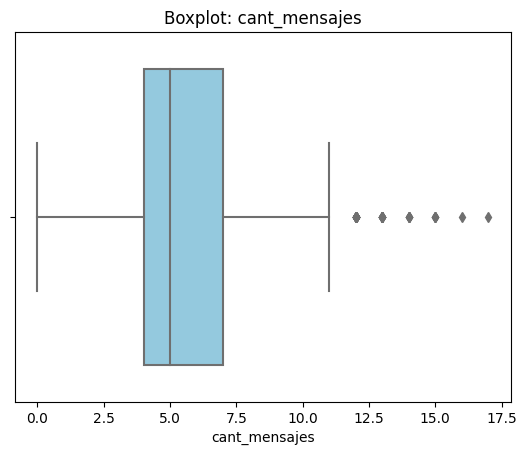

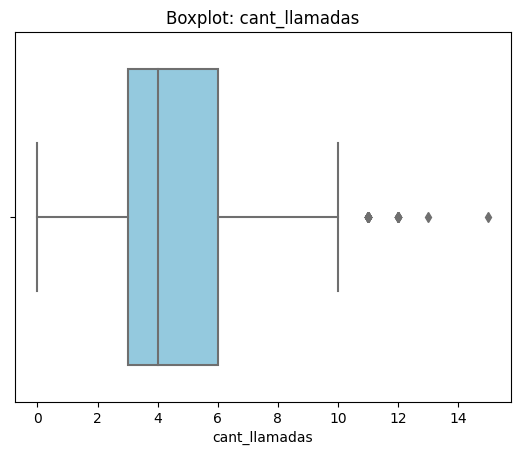

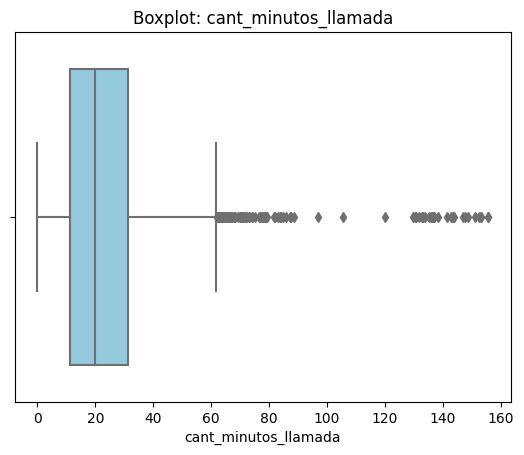

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.show()

💡Insights:
- Age: No muestra outliers, la mediana se encuentra hacia la mitad de los valores de edad confirmando la simetría de los datos.
- cant_mensajes: Los puntos aislados a la derecha son outliers (12,5–17,5) revelando que unos pocos usuarios envían una cantidad mayor de mensajes, la caja (IQR) está hacia la izquierda mostrando que la mayoría de los datos están entre 4 a 7.
- cant_llamadas: Los puntos aislados a la derecha son outliers (11–15) revelando que unos pocos usuarios hacen una cantidad mayor de llamadas, la caja (IQR) está hacia la izquierda mostrando que la mayoría de los datos están entre 3 a 6.
- cant_minutos_llamada: Los puntos aislados a la derecha son outliers (60–160), la mediana está en valores bajos, indicando que la mitad de la duración de las llamadas es baja. La caja (IQR) es estrecha y está a la izquierda confirmando que la mayoría de las llamadas tienen una duración baja.

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    print(col,'Upper',upper,'IQR', IQR)

cant_mensajes Upper 11.5 IQR 3.0
cant_llamadas Upper 10.5 IQR 3.0
cant_minutos_llamada Upper 61.8575 IQR 20.295


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000




💡Insights:
- cant_mensajes: Se deben mantener outliers porque son datos reales que representan a los clientes que enviaron más mensajes.
- cant_llamadas: Se deben mantener outliers porque son datos reales que representan a los clientes que hicieron más llamadas.
- cant_minutos_llamada: Se deben mantener outliers porque son datos reales que representan a los clientes que más tiempo duraron al teléfono en las llamadas.



---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso

def clasificar_uso(row):
    if row['cant_mensajes'] < 5 and row['cant_llamadas'] < 5:
        return 'Bajo uso'
    elif row['cant_mensajes'] < 10 and row['cant_llamadas'] < 10:
        return 'Uso medio'
    else:
        return 'Alto uso'

# Aplicar la función a cada fila
user_profile['grupo_uso'] = user_profile.apply(clasificar_uso, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
def clasificar_edad(row):
    if row['age'] < 30:
        return 'Joven'
    elif row['age'] < 60:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

# Aplicar la función a cada fila
user_profile['grupo_edad'] = user_profile.apply(clasificar_edad, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio,Adulto
1,10001,5,10,33.18,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

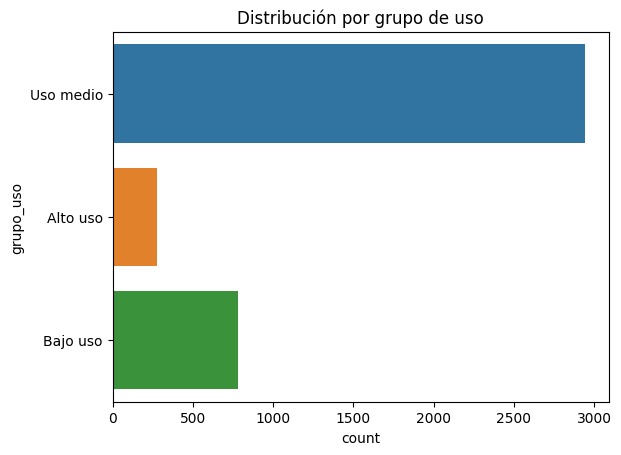

In [ ]:
# Visualización de los segmentos por uso

sns.countplot(data=user_profile, y='grupo_uso')
plt.title('Distribución por grupo de uso')
plt.show()

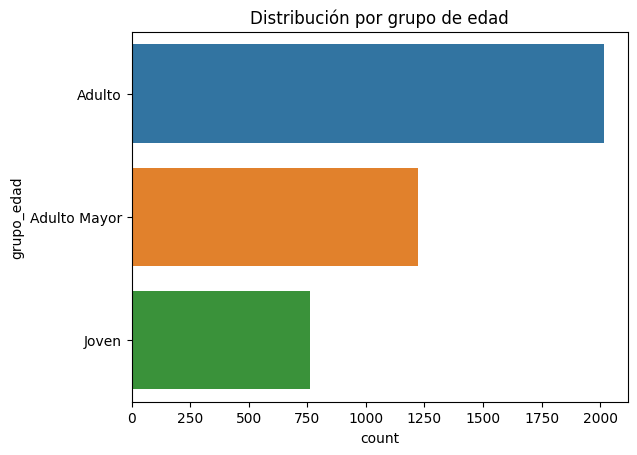

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, y='grupo_edad')
plt.title('Distribución por grupo de edad')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

- Valores faltantes en churn_date (88,35%):
3534 de 4000 registros estaban vacíos. Dado su alto porcentaje y la falta de contexto temporal confiable, se decidió no usar esta variable en el análisis actual.

- Valores faltantes y sentinels en city (11,7%):
469 registros nulos y presencia del sentinel "?". Se estandarizó reemplazando "?" por valores nulos (NA), evitando inferencias incorrectas sobre la ubicación del usuario.

- Valores inválidos en age (-999):
Se detectó un sentinel claro que distorsionaba las métricas (desviación estándar inflada). Fue corregido reemplazándolo por la mediana, preservando la distribución real de edades.

- Fechas futuras en reg_date (año 2026):
40 registros (~1%) con fechas imposibles para el contexto del negocio. Se marcaron como nulos (NaT) al ser una fracción pequeña que no justifica imputación.

- Valores nulos en duration y length (44–55%):
Se confirmó que estos nulos son MAR (Missing At Random) y dependen de la variable type (llamada vs mensaje), por lo que no representan un problema de calidad, sino la naturaleza del dato.


🔍 **Segmentos por Edad**

Se identificaron tres grupos claros:

- Jóvenes (<30 años)
Segmento minoritario. Uso moderado, con menor número de llamadas y mensajes.

- Adultos (30–59 años)
Segmento predominante del negocio. Presentan uso medio estable, con equilibrio entre llamadas y mensajes. Constituyen la base principal de ingresos.

- Adultos Mayores (≥60 años)
Menor volumen de usuarios, pero con casos de uso intensivo, especialmente en duración de llamadas. Este grupo muestra necesidades específicas de comunicación.

➡️ Insight clave: la edad no limita el uso; usuarios mayores pueden ser intensivos y valiosos si el plan se ajusta a su comportamiento.

📊 **Segmentos por Nivel de Uso**

Según llamadas y mensajes, se clasificaron tres grupos:

- Bajo uso
Usuarios con menos de 5 llamadas y mensajes. Probablemente clientes de bajo ingreso promedio por usuario, sensibles al precio.

- Uso medio (segmento mayoritario)
Usuarios con consumo moderado y estable. Representan el core del negocio y la mayor parte de la base de clientes.

- Alto uso
Minoría de usuarios con alta cantidad de llamadas y/o mensajes. Frecuentemente asociados al plan Premium y a mayores tiempos de llamada.

➡️ Esto sugiere que: existe una relación clara entre uso alto y preferencia por planes Premium, especialmente en llamadas largas.

💡 **Recomendaciones**

Crear planes diferenciados por comportamiento, no solo por volumen:

- Plan “Llamadas Ilimitadas” para usuarios de alta duración.

- Plan económico para usuarios de bajo uso con precio reducido.

Estrategias de migración (upselling):

- Identificar usuarios de uso medio cercanos al umbral alto y ofrecer beneficios Premium personalizados.

Segmentación por edad + uso:

- Ofertas simplificadas para adultos mayores con foco en llamadas.

- Promociones digitales para adultos jóvenes orientadas a mensajes y datos.

Mejorar la captura de datos:

- Validaciones automáticas de edad y fechas.

- Eliminación temprana de sentinels en sistemas operativos.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`